Analisis exploratorio de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
sns.set(style="whitegrid")

# Cargar el archivo CSV
df = pd.read_csv('bank.csv', sep=';')

# Ver las primeras filas
display(df.head())

# Información general del dataset
print("Información general:")
df.info()

# Estadísticas descriptivas para variables numéricas
print("\nEstadísticas descriptivas:")
display(df.describe())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB

Estadísticas descriptivas:


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Analizar la variable objetivo : 'y'

Distribución de la variable 'y':
y
no     0.88476
yes    0.11524
Name: proportion, dtype: float64


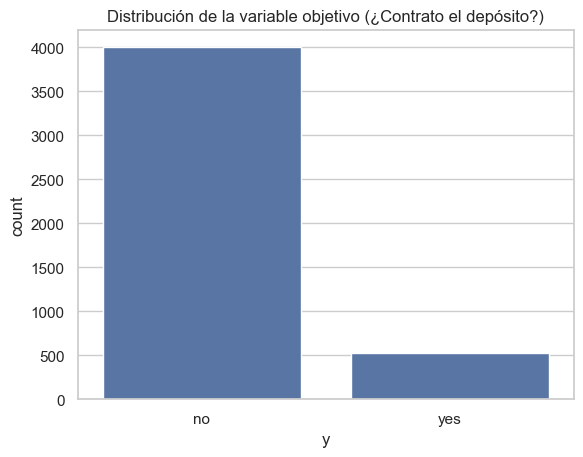

In [2]:
# Distribución de la variable objetivo
print("Distribución de la variable 'y':")
print(df['y'].value_counts(normalize=True))  # proporciones

# Gráfico de distribución
sns.countplot(x='y', data=df)
plt.title('Distribución de la variable objetivo (¿Contrato el depósito?)')
plt.show()



Analisis de valores nulos y unknown

Análisis de valores nulos y unknown por columna:

Resumen de valores nulos y unknown:
           Valores_Nulos  Valores_Unknown  Total_Registros  Porcentaje_Nulos  \
job                    0               38             4521               0.0   
education              0              187             4521               0.0   
contact                0             1324             4521               0.0   
poutcome               0             3705             4521               0.0   

           Porcentaje_Unknown  
job                  0.840522  
education            4.136253  
contact             29.285556  
poutcome            81.950896  


<Figure size 1200x600 with 0 Axes>

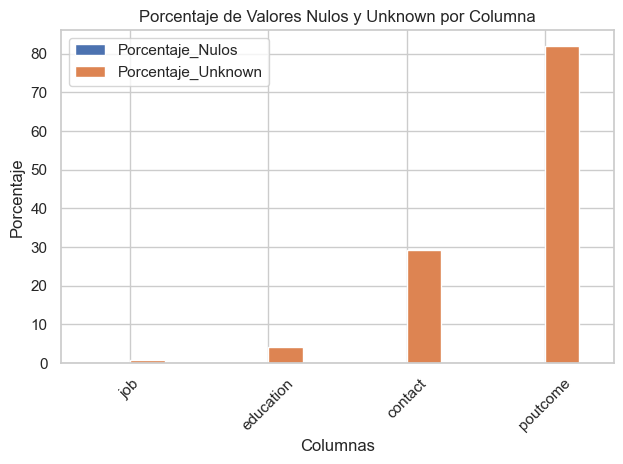


Análisis detallado de valores 'unknown' por columna:

Columna: job
Distribución de valores:
job
management       0.214
blue-collar      0.209
technician       0.170
admin.           0.106
services         0.092
retired          0.051
self-employed    0.040
entrepreneur     0.037
unemployed       0.028
housemaid        0.025
student          0.019
unknown          0.008
Name: proportion, dtype: float64

Columna: education
Distribución de valores:
education
secondary    0.510
tertiary     0.299
primary      0.150
unknown      0.041
Name: proportion, dtype: float64

Columna: contact
Distribución de valores:
contact
cellular     0.641
unknown      0.293
telephone    0.067
Name: proportion, dtype: float64

Columna: poutcome
Distribución de valores:
poutcome
unknown    0.820
failure    0.108
other      0.044
success    0.029
Name: proportion, dtype: float64


In [3]:
# Análisis combinado de valores nulos y unknown
print("Análisis de valores nulos y unknown por columna:")

# Crear un DataFrame para el análisis
null_analysis = pd.DataFrame({
    'Valores_Nulos': df.isnull().sum(),
    'Valores_Unknown': (df == 'unknown').sum(),
    'Total_Registros': len(df)
})

# Calcular porcentajes
null_analysis['Porcentaje_Nulos'] = (null_analysis['Valores_Nulos'] / null_analysis['Total_Registros']) * 100
null_analysis['Porcentaje_Unknown'] = (null_analysis['Valores_Unknown'] / null_analysis['Total_Registros']) * 100

# Mostrar solo las columnas que tienen valores nulos o unknown
null_analysis = null_analysis[(null_analysis['Valores_Nulos'] > 0) | (null_analysis['Valores_Unknown'] > 0)]
print("\nResumen de valores nulos y unknown:")
print(null_analysis)

# Visualización
plt.figure(figsize=(12, 6))
null_analysis[['Porcentaje_Nulos', 'Porcentaje_Unknown']].plot(kind='bar')
plt.title('Porcentaje de Valores Nulos y Unknown por Columna')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis detallado de las columnas con valores unknown
print("\nAnálisis detallado de valores 'unknown' por columna:")
for column in df.columns:
    if (df[column] == 'unknown').any():
        print(f"\nColumna: {column}")
        print("Distribución de valores:")
        print(df[column].value_counts(normalize=True).round(3))

Determinar los atributos mas importantes con respecto a la clase objetivo

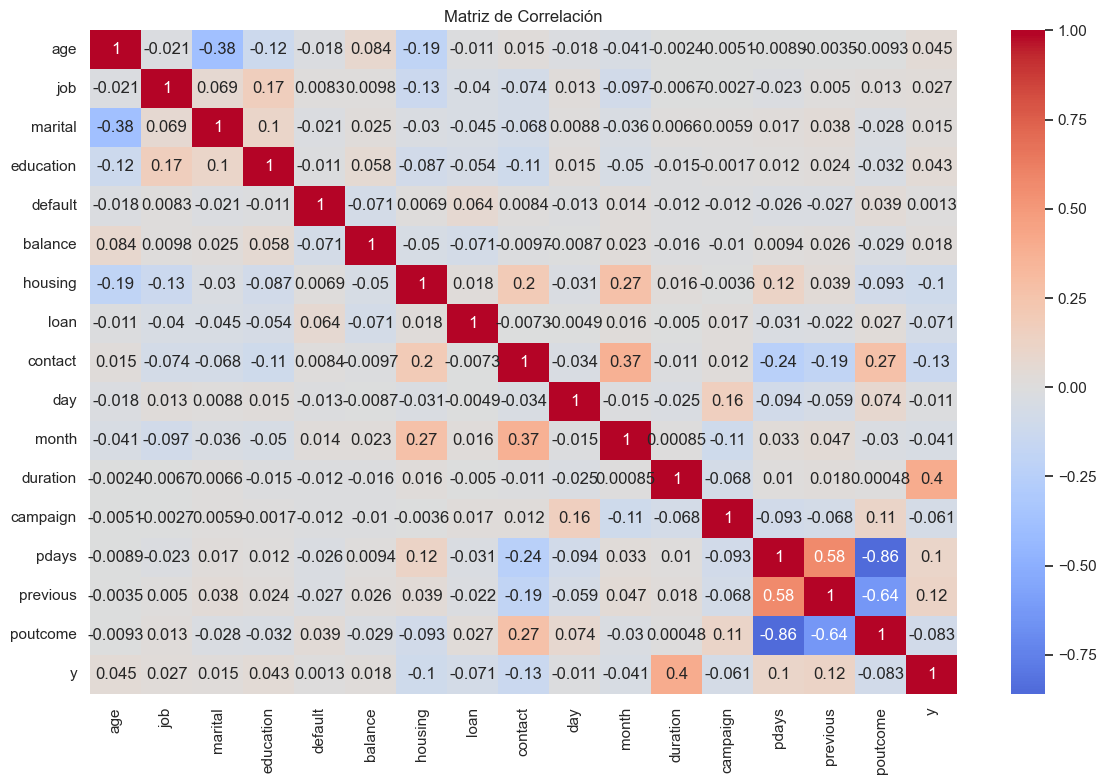

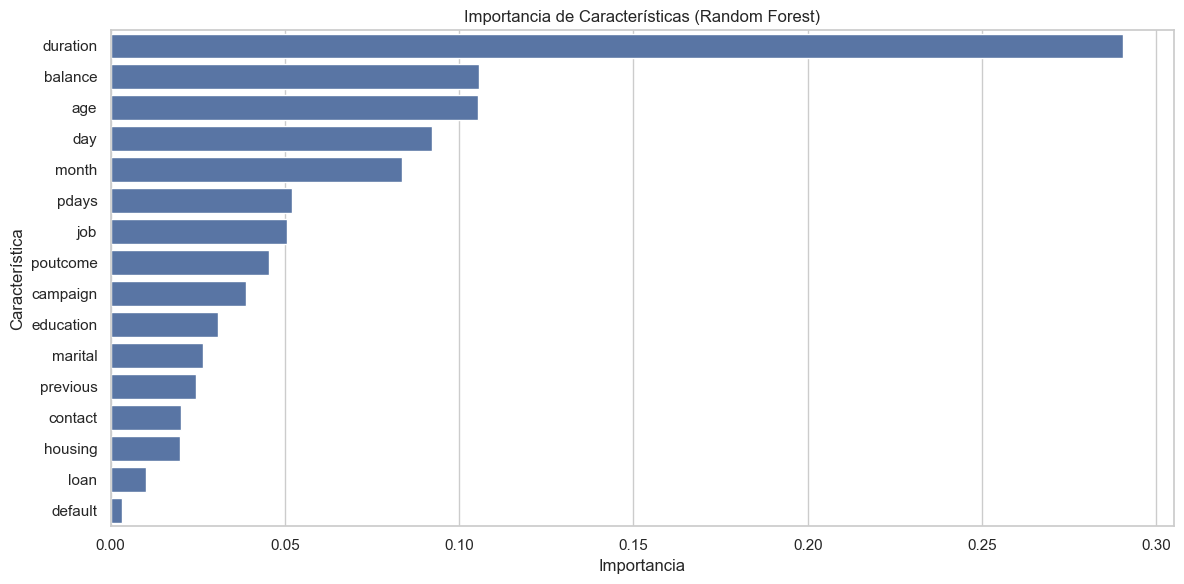


Top 10 características más importantes:
   Característica  Importancia
11       duration     0.290557
5         balance     0.105800
0             age     0.105436
9             day     0.092174
10          month     0.083508
13          pdays     0.052059
1             job     0.050703
15       poutcome     0.045556
12       campaign     0.038802
3       education     0.030945


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Configuración visual
sns.set(style="whitegrid")

# Cargar el archivo CSV
df_visualizar = pd.read_csv('bank.csv', sep=';')

# Preparación de datos para el análisis
# Convertir la variable objetivo a numérica
le = LabelEncoder()
df_visualizar['y'] = le.fit_transform(df_visualizar['y'])

# Convertir variables categóricas a numéricas
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_visualizar[col] = le.fit_transform(df_visualizar[col])

# 1. Análisis de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df_visualizar.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

# 2. Análisis de importancia de características usando Random Forest
X = df_visualizar.drop('y', axis=1)
y = df_visualizar['y']

# Entrenar un modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Obtener importancia de características
feature_importance = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('Importancia', ascending=False)

# Visualizar importancia de características
plt.figure(figsize=(12, 6))
sns.barplot(x='Importancia', y='Característica', data=feature_importance)
plt.title('Importancia de Características (Random Forest)')
plt.tight_layout()
plt.show()

# Mostrar las características más importantes
print("\nTop 10 características más importantes:")
print(feature_importance.head(10))

Convertir los unknown a nulos

In [5]:
# Primero, veamos cuántos valores 'unknown' hay antes de la limpieza
print("Antes de la limpieza:")
print(df.isin(['unknown']).sum())

# Crear una copia del DataFrame
df_clean = df.copy()

# Reemplazar 'unknown' con NaN
df_clean = df_clean.replace('unknown', pd.NA)

# Verificar si quedaron valores 'unknown'
print("\nDespués de la limpieza:")
print(df_clean.isin(['unknown']).sum())

# Mostrar el número de filas antes y después
print(f"\nNúmero de filas antes: {len(df)}")
print(f"Número de filas después: {len(df_clean)}")

# Mostrar las columnas que aún tienen valores 'unknown' si las hay
unknown_columns = df_clean.columns[df_clean.isin(['unknown']).any()].tolist()
if unknown_columns:
    print("\nColumnas que aún tienen valores 'unknown':")
    print(unknown_columns)

Antes de la limpieza:
age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

Después de la limpieza:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Número de filas antes: 4521
Número de filas después: 4521


Análisis de valores nulos por columna

In [6]:
print("Porcentaje de valores nulos por columna:")
for col in ['job', 'education', 'contact', 'poutcome']:
    nulos = df_clean[col].isnull().sum()
    porcentaje = (nulos / len(df_clean)) * 100
    print(f"{col}: {porcentaje:.2f}%")

Porcentaje de valores nulos por columna:
job: 0.84%
education: 4.14%
contact: 29.29%
poutcome: 81.95%


Eliminar la columna poutcome y contact , ademas de las filas job , education 

In [7]:
df_clean = df.drop(columns =['poutcome'])
df_clean = df_clean.drop(columns =['contact'])

for col in ['job' , 'education']:
    df_clean = df_clean[df_clean[col] != 'unknown']



print("Tamano inicial de dataset: ",df.shape[0])
print("Tamano final del dataset: ",df_clean.shape[0])

Tamano inicial de dataset:  4521
Tamano final del dataset:  4311


Ya ambas columnas eliminadas

In [8]:
display(df_clean.head())

# Información general del dataset
print("Información general:")
df_clean.info()

# Estadísticas descriptivas para variables numéricas
print("\nEstadísticas descriptivas:")
display(df_clean.describe())

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,30,unemployed,married,primary,no,1787,no,no,19,oct,79,1,-1,0,no
1,33,services,married,secondary,no,4789,yes,yes,11,may,220,1,339,4,no
2,35,management,single,tertiary,no,1350,yes,no,16,apr,185,1,330,1,no
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,199,4,-1,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,226,1,-1,0,no


Información general:
<class 'pandas.core.frame.DataFrame'>
Index: 4311 entries, 0 to 4520
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4311 non-null   int64 
 1   job        4311 non-null   object
 2   marital    4311 non-null   object
 3   education  4311 non-null   object
 4   default    4311 non-null   object
 5   balance    4311 non-null   int64 
 6   housing    4311 non-null   object
 7   loan       4311 non-null   object
 8   day        4311 non-null   int64 
 9   month      4311 non-null   object
 10  duration   4311 non-null   int64 
 11  campaign   4311 non-null   int64 
 12  pdays      4311 non-null   int64 
 13  previous   4311 non-null   int64 
 14  y          4311 non-null   object
dtypes: int64(7), object(8)
memory usage: 538.9+ KB

Estadísticas descriptivas:


,age,balance,day,duration,campaign,pdays,previous
count,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000
mean,40.970309,1410.662723,15.908142,264.833449,2.805382,39.741591,0.544885
std,10.500185,3015.650889,8.205590,260.940391,3.134040,100.048485,1.705530
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,66.500000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,440.000000,16.000000,187.000000,2.000000,-1.000000,0.000000
75%,48.000000,1456.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Entrenamiento y prueba

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Convertir variable objetivo a numérica
df_clean['y'] = df_clean['y'].map({'yes': 1, 'no': 0})

# Separar características y target
X = df_clean.drop('y', axis=1)
y = df_clean['y']

# Identificar columnas numéricas y categóricas
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocesamiento con ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ])

# División estratificada del dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("División completada:")
print(f"  Train: {X_train.shape[0]} muestras")
print(f"  Test: {X_test.shape[0]} muestras")
print(f"  Positivos en train: {np.sum(y_train)} ({np.mean(y_train)*100:.2f}%)")

División completada:
  Train: 3017 muestras
  Test: 1294 muestras
  Positivos en train: 349 (11.57%)



🔍  Entrenando: Árbol de Decisión
Fitting 5 folds for each of 12 candidates, totalling 60 fits

✔️ Mejores parámetros: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 5, 'classifier__min_samples_split': 2}
⭐ AUC-ROC: 0.7960 | F1-score: 0.4233 | AP: 0.3733

📋 Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.9569    0.7755    0.8567      1145
           1     0.2978    0.7315    0.4233       149

    accuracy                         0.7705      1294
   macro avg     0.6274    0.7535    0.6400      1294
weighted avg     0.8810    0.7705    0.8068      1294



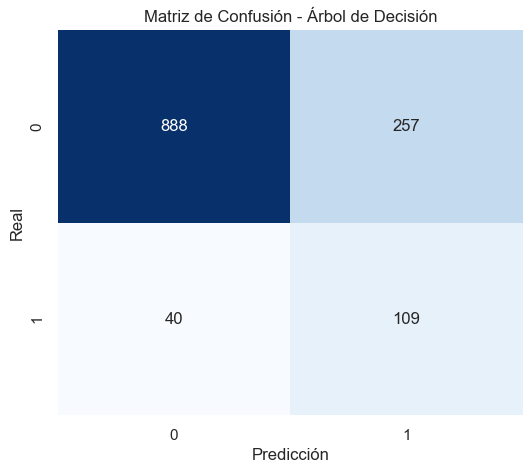

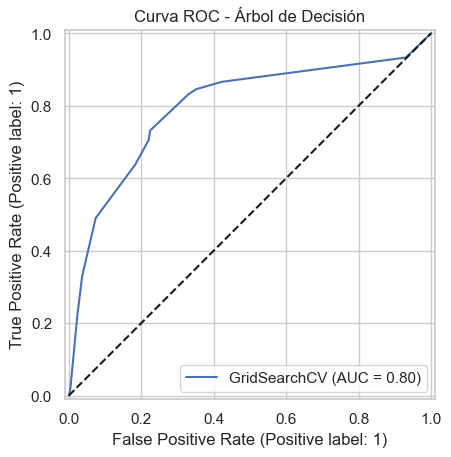

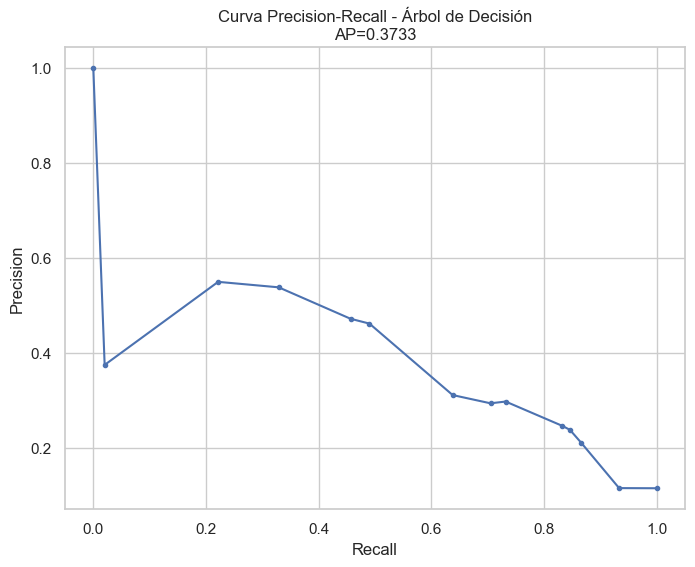


🔍  Entrenando: Random Forest
Fitting 5 folds for each of 12 candidates, totalling 60 fits

✔️ Mejores parámetros: {'classifier__class_weight': 'balanced', 'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
⭐ AUC-ROC: 0.8935 | F1-score: 0.2885 | AP: 0.4594

📋 Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.9036    0.9747    0.9378      1145
           1     0.5085    0.2013    0.2885       149

    accuracy                         0.8856      1294
   macro avg     0.7061    0.5880    0.6131      1294
weighted avg     0.8581    0.8856    0.8630      1294



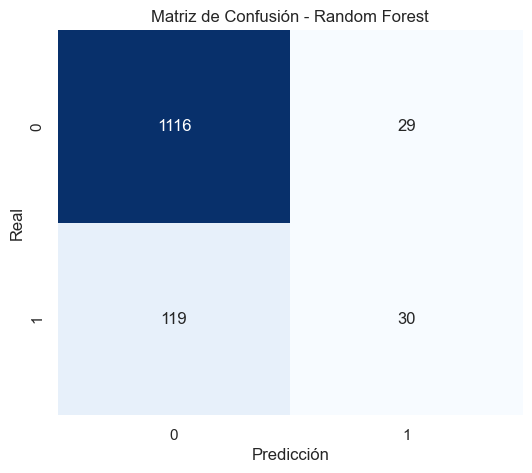

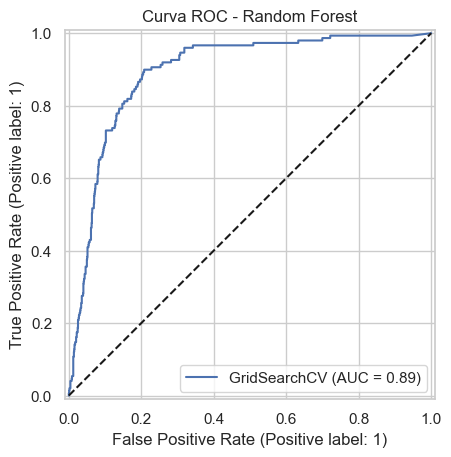

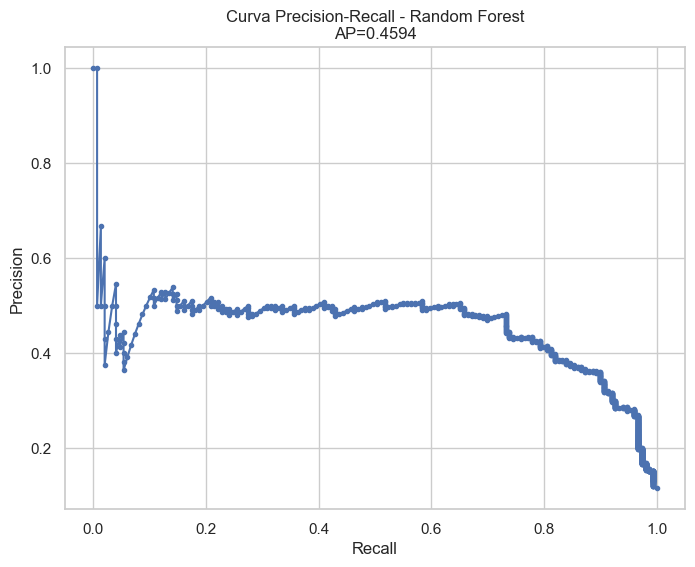


🔍  Entrenando: SVM
Fitting 5 folds for each of 6 candidates, totalling 30 fits

✔️ Mejores parámetros: {'classifier__C': 1, 'classifier__class_weight': 'balanced', 'classifier__kernel': 'rbf'}
⭐ AUC-ROC: 0.8838 | F1-score: 0.5403 | AP: 0.4625

📋 Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.9657    0.8611    0.9104      1145
           1     0.4176    0.7651    0.5403       149

    accuracy                         0.8501      1294
   macro avg     0.6917    0.8131    0.7254      1294
weighted avg     0.9026    0.8501    0.8678      1294



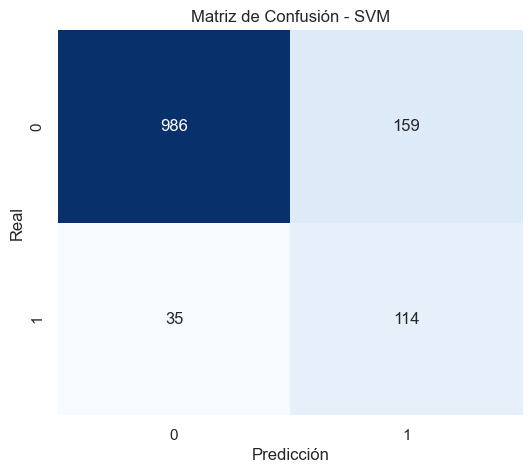

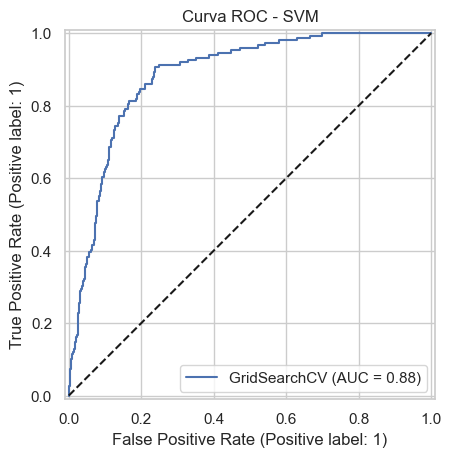

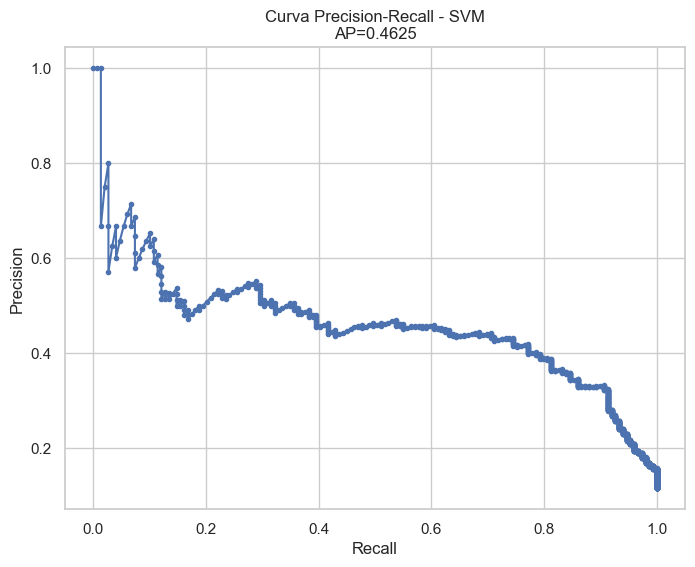


🔍  Entrenando: Regresión Logística
Fitting 5 folds for each of 8 candidates, totalling 40 fits

✔️ Mejores parámetros: {'classifier__C': 1, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2'}
⭐ AUC-ROC: 0.8748 | F1-score: 0.4873 | AP: 0.4475

📋 Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.9650    0.8183    0.8856      1145
           1     0.3560    0.7718    0.4873       149

    accuracy                         0.8130      1294
   macro avg     0.6605    0.7951    0.6865      1294
weighted avg     0.8949    0.8130    0.8398      1294



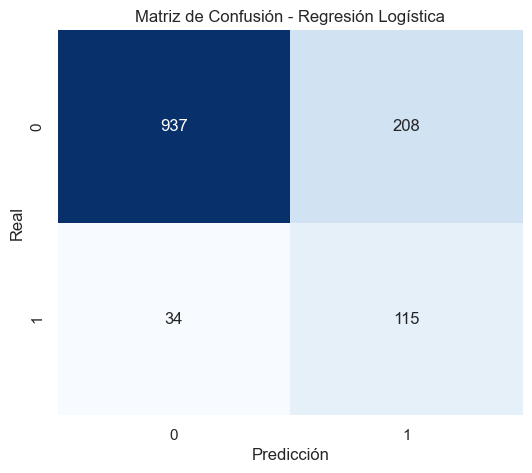

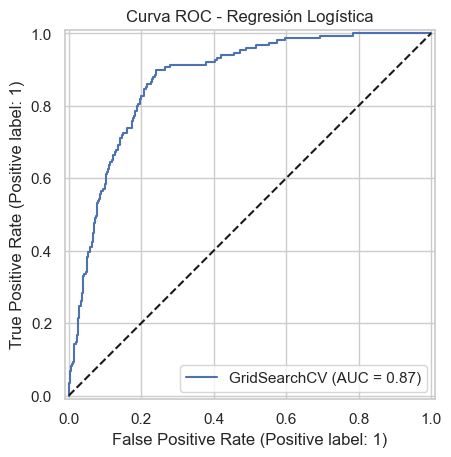

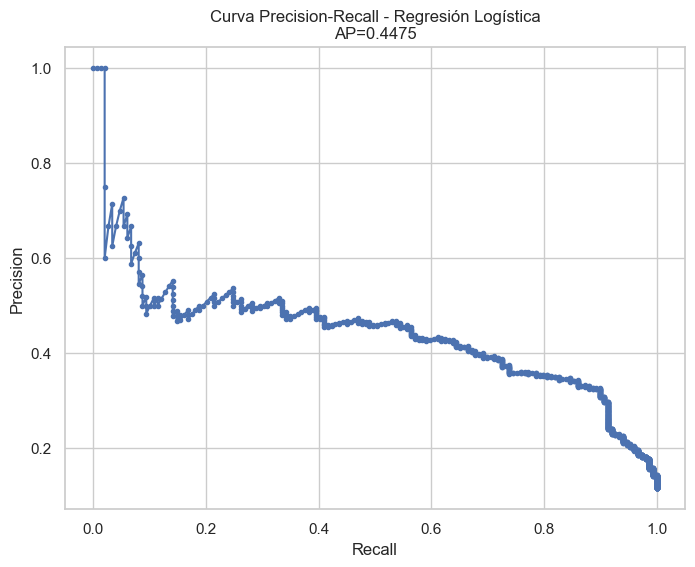


🔍  Entrenando: MLP Mejorado
Fitting 5 folds for each of 32 candidates, totalling 160 fits

✔️ Mejores parámetros: {'classifier__activation': 'tanh', 'classifier__alpha': 0.1, 'classifier__batch_size': 64, 'classifier__hidden_layer_sizes': (150, 100), 'classifier__learning_rate': 'adaptive', 'classifier__learning_rate_init': 0.01, 'classifier__solver': 'adam'}
⭐ AUC-ROC: 0.8730 | F1-score: 0.3467 | AP: 0.4485

📋 Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.9097    0.9677    0.9378      1145
           1     0.5132    0.2617    0.3467       149

    accuracy                         0.8864      1294
   macro avg     0.7114    0.6147    0.6422      1294
weighted avg     0.8640    0.8864    0.8697      1294



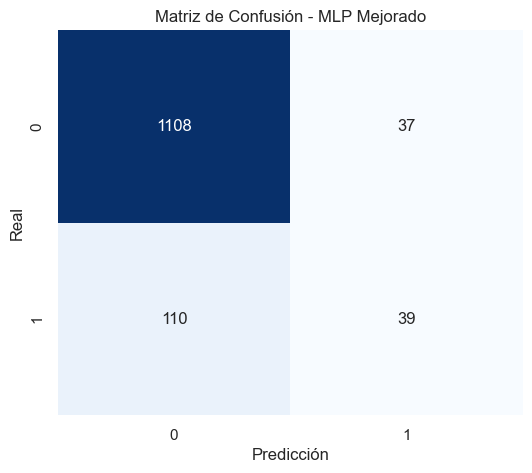

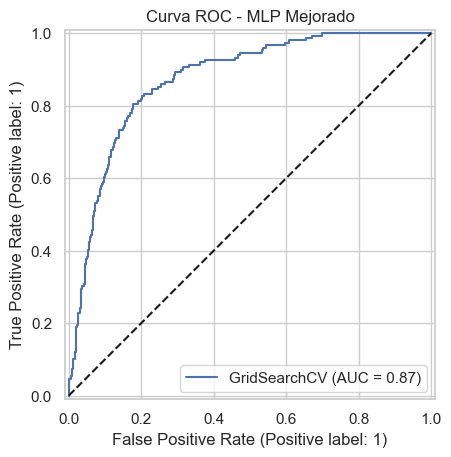

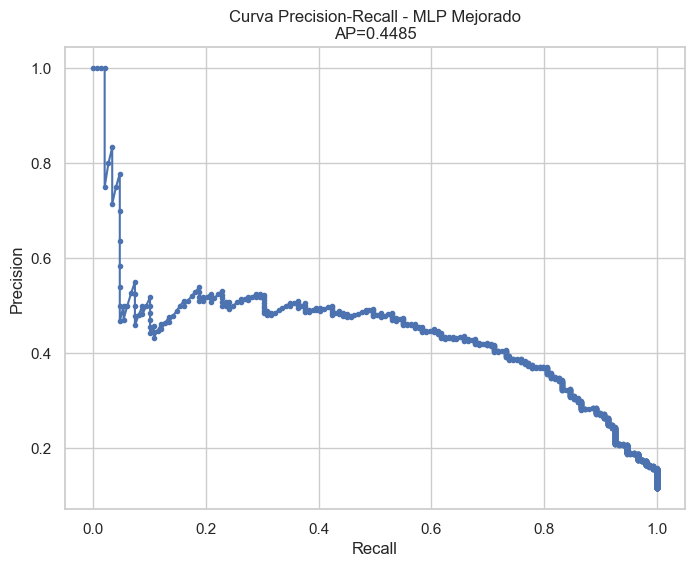

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, RocCurveDisplay, 
                             precision_recall_curve, auc,
                             f1_score, average_precision_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración común
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {'AUC': 'roc_auc', 'AP': 'average_precision', 'F1': 'f1'}

# Definición de modelos y parámetros
modelos = {
    'Árbol de Decisión': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'classifier__max_depth': [3, 5, 10, None],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__class_weight': ['balanced']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [50, 100],
            'classifier__max_depth': [10, 20, None],
            'classifier__min_samples_split': [2, 5],
            'classifier__class_weight': ['balanced']
        }
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf'],
            'classifier__class_weight': ['balanced']
        }
    },
    'Regresión Logística': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'classifier__C': [0.01, 0.1, 1, 10],
            'classifier__penalty': ['l2', None],
            'classifier__class_weight': ['balanced']
        }
    },
    'MLP Mejorado': {
        'model': MLPClassifier(
            max_iter=2000,
            early_stopping=True,
            n_iter_no_change=50,
            validation_fraction=0.2,
            random_state=42
        ),
        'params': {
            'classifier__hidden_layer_sizes': [(150, 100), (100, 80, 50)],
            'classifier__alpha': [0.05, 0.1],
            'classifier__learning_rate_init': [0.01, 0.05],
            'classifier__activation': ['relu', 'tanh'],
            'classifier__batch_size': [64, 128],
            'classifier__solver': ['adam'],
            'classifier__learning_rate': ['adaptive']
        }
    }
}

# Entrenamiento y evaluación
for nombre, config in modelos.items():
    print(f"\n{'='*50}")
    print(f"🔍  Entrenando: {nombre}")
    print(f"{'='*50}")
    
    # Crear pipeline con preprocesamiento y modelo
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', config['model'])
    ])
    
    # Búsqueda de hiperparámetros
    grid = GridSearchCV(
        pipe,
        config['params'],
        cv=cv,
        scoring=scoring,
        refit='AP',  # Optimiza por Average Precision
        n_jobs=-1,
        verbose=1
    )
    
    # Entrenar sin sample_weight (especialmente para MLP)
    grid.fit(X_train, y_train)
    
    # Evaluación
    y_pred = grid.predict(X_test)
    y_prob = grid.predict_proba(X_test)[:, 1] if hasattr(grid.best_estimator_, "predict_proba") else None
    
    # Métricas clave
    f1 = f1_score(y_test, y_pred)
    
    # Manejar casos donde no hay probabilidades
    if y_prob is not None:
        roc_auc = roc_auc_score(y_test, y_prob)
        avg_precision = average_precision_score(y_test, y_prob)
    else:
        roc_auc = None
        avg_precision = None
    
    print(f"\n✔️ Mejores parámetros: {grid.best_params_}")
    
    if roc_auc is not None:
        print(f"⭐ AUC-ROC: {roc_auc:.4f} | F1-score: {f1:.4f} | AP: {avg_precision:.4f}")
    else:
        print(f"⭐ F1-score: {f1:.4f}")
        
    print("\n📋 Reporte de clasificación:")
    print(classification_report(y_test, y_pred, digits=4))
    
    # Matriz de confusión
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()
    
    # Curva ROC (solo si hay probabilidades)
    if y_prob is not None:
        RocCurveDisplay.from_estimator(grid, X_test, y_test)
        plt.title(f"Curva ROC - {nombre}")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.show()
        
        # Curva Precision-Recall
        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        plt.figure(figsize=(8, 6))
        plt.plot(recall, precision, marker='.')
        plt.title(f"Curva Precision-Recall - {nombre}\nAP={avg_precision:.4f}" if avg_precision else f"Curva Precision-Recall - {nombre}")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.grid(True)
        plt.show()

ENTRENAR Y GUARDAR MODELO FINAL

In [11]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Cargar datos limpios
df_clean = pd.read_csv('bank.csv', sep=';')
df_clean = df_clean.drop(columns=['poutcome', 'contact'])
for col in ['job', 'education']:
    df_clean = df_clean[df_clean[col] != 'unknown']
df_clean['y'] = df_clean['y'].map({'yes': 1, 'no': 0})

# Definir preprocesador
cat_cols = df_clean.drop('y', axis=1).select_dtypes(include=['object']).columns
num_cols = df_clean.drop('y', axis=1).select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ])

# Crear pipeline con mejores parámetros SVM
best_svm = SVC(
    C=1, 
    kernel='rbf', 
    class_weight='balanced', 
    probability=True,
    random_state=42
)

pipeline_final = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', best_svm)
])

# Entrenar con todos los datos
X = df_clean.drop('y', axis=1)
y = df_clean['y']
pipeline_final.fit(X, y)

# Guardar modelo
joblib.dump(pipeline_final, 'modelo_svm_final.pkl')
print("Modelo SVM final guardado como 'modelo_svm_final.pkl'")

Modelo SVM final guardado como 'modelo_svm_final.pkl'
